In [142]:
import xlrd

folders = ["06-07", "07-08", "08-09", "09-10", "10-11", "11-12", "12-13", \
           "13-14", "14-15", "15-16", "16-17", "17-18", "18-19", "19-20"]
files = ["2006_2007", "2007_2008", "2008_2009", "2009_2010", "2010_2011", \
         "2011_2012", "2012_2013", "2013_2014", "2014_2015", "2015_2016", \
         "2016_2017", "2017_2018", "2018_2019", "2019_2020"]
quarters = ["Q1", "Q2", "Q3", "Q4"]


In [143]:
def getData(filename):
    workbook = xlrd.open_workbook(filename)
    worksheet = workbook.sheet_by_index(0)

    data = []
    start_row = 6

    for i in range(start_row, worksheet.nrows):
        school_name = worksheet.cell(i, 1).value
        school_state = worksheet.cell(i, 2).value
        school_type = worksheet.cell(i, 4).value
        school_sub = [worksheet.cell(i, 5).value, worksheet.cell(i, 6).value, worksheet.cell(i, 7).value,\
                      worksheet.cell(i, 8).value, worksheet.cell(i, 9).value]
        school_unsub = [worksheet.cell(i, 10).value, worksheet.cell(i, 11).value,\
                        worksheet.cell(i, 12).value, worksheet.cell(i, 13).value,\
                        worksheet.cell(i, 14).value]
        school_plus = [worksheet.cell(i, 20).value, worksheet.cell(i, 21).value,\
                       worksheet.cell(i, 22).value, worksheet.cell(i, 23).value,\
                       worksheet.cell(i, 24).value]

        row = {}
        row['state'] = school_state
        row['type'] = school_type
        row['sub'] = school_sub
        row['unsub'] = school_unsub
        row['plus'] = school_plus
        data.append(row)
    return data


In [144]:
average_loan_per_person = {}  # this is the average for that year and quarter, [year][quarter]
average_loan_school_type = {} # this is the average loan for that school type, [year][quarter][type]
average_loan_state = {}       # this is the average loan for that each state , [year][quarter][state]

In [145]:
def getMetrics(data, year, quarter):
    # indexed off school type ('Public, private') and state the school is in ("TN")
    # total gives running total, other gives count
    school_type_total = {}
    school_type_count = {}
    state_total = {}
    state_count = {}
    
    total_dollar_disbursed = 0
    sub_dollar_disbursed = 0
    unsub_dollar_disbursed = 0
    plus_dollar_disbursed = 0

    total_num_disbursed = 0
    sub_num_disbursed = 0
    unsub_num_disbursed = 0
    plus_num_disbursed = 0


    for row in data:
        school_type = row['type'].upper()
        school_state = row['state'].upper()
        
        # init keys here since we do += below
        if school_type not in school_type_total:
            school_type_total[school_type] = 0
        if school_type not in school_type_count:
            school_type_count[school_type] = 0
        if school_state not in state_total:
            state_total[school_state] = 0
        if school_state not in state_count:
            state_count[school_state] = 0

        if row['sub'][4] != '-' and row['sub'][4] != ' -':            
            total_dollar_disbursed += row['sub'][4]
            sub_dollar_disbursed += row['sub'][4]
            total_num_disbursed += row['sub'][3]
            sub_num_disbursed += row['sub'][3]
            
            school_type_total[school_type] += row['sub'][4]
            school_type_count[school_type] += row['sub'][3]
            state_total[school_state] += row['sub'][4]
            state_count[school_state] += row['sub'][3]

        if row['unsub'][4] != '-' and row['unsub'][4] != ' -':
            total_dollar_disbursed += row['unsub'][4]
            unsub_dollar_disbursed += row['unsub'][4]
            total_num_disbursed += row['unsub'][3]
            unsub_num_disbursed += row['unsub'][3]
            
            school_type_total[school_type] += row['unsub'][4]
            school_type_count[school_type] += row['unsub'][3]
            state_total[school_state] += row['unsub'][4]
            state_count[school_state] += row['unsub'][3]

        if row['plus'][4] != '-' and row['plus'][4] != ' -':
            total_dollar_disbursed += row['plus'][4]
            plus_dollar_disbursed += row['plus'][4]
            total_num_disbursed += row['plus'][3]
            plus_num_disbursed += row['plus'][3]
            
            school_type_total[school_type] += row['plus'][4]
            school_type_count[school_type] += row['plus'][3]
            state_total[school_state] += row['plus'][4]
            state_count[school_state] += row['plus'][3]
            
    # init dictionaries here since they might not exist when dereferencing them below
    if year not in average_loan_per_person:
        average_loan_per_person[year] = {}
    if year not in average_loan_school_type:
        average_loan_school_type[year] = {}
    if year not in average_loan_state:
        average_loan_state[year] = {}

    if quarter not in average_loan_per_person[year]:
        average_loan_per_person[year][quarter] = {}
    if quarter not in average_loan_school_type[year]:
        average_loan_school_type[year][quarter] = {}
    if quarter not in average_loan_state[year]:
        average_loan_state[year][quarter] = {}

        
    if total_num_disbursed == 0:
        average_loan_per_person[year][quarter] = 0;
    else:
        average_loan_per_person[year][quarter] = total_dollar_disbursed/total_num_disbursed
    
    for key in school_type_total.keys():
        if key not in average_loan_school_type[year][quarter]:
            average_loan_school_type[year][quarter][key] = {}
        
        # handle division by 0
        if school_type_count[key] == 0:
            average_loan_school_type[year][quarter][key] = 0
        else:
            average_loan_school_type[year][quarter][key] = school_type_total[key]/school_type_count[key]
    for key in state_total.keys():
        if key not in average_loan_state[year][quarter]:
            average_loan_state[year][quarter][key] = {}
            
        # handle division by 0
        if state_count[key] == 0:
            average_loan_state[year][quarter][key] = 0
        else:
            average_loan_state[year][quarter][key] = state_total[key]/state_count[key]


In [146]:
for i in range(len(folders)):
    for quarter in quarters:
        filename = '../data/06-20/' + folders[i] + '/DL_Dashboard_AY' + files[i] + '_' + quarter + '.xls'
        data = getData(filename)
        getMetrics(data, files[i], quarter)

In [147]:
# convert data into an easy-to-graph representation
average_loan_per_person_array = {}  # year_quarter: average loan amount
average_loan_school_type_array = {} # school type: year_quarter: average loan amount
average_loan_state_array = {} # state: year_quarter: average loan amount

for year in average_loan_per_person:
    for quarter in average_loan_per_person[year]:
        x = year+'_'+quarter
        average_loan_per_person_array[x] = average_loan_per_person[year][quarter]
        
        for school_type in average_loan_school_type[year][quarter]:
            if school_type not in average_loan_school_type_array:
                average_loan_school_type_array[school_type] = {}
            average_loan_school_type_array[school_type][x] = average_loan_school_type[year][quarter][school_type]
            
        for state in average_loan_state[year][quarter]:
            if state not in average_loan_state_array:
                average_loan_state_array[state] = {}
            average_loan_state_array[state][x] = average_loan_state[year][quarter][state]

# test prints
# print(average_loan_per_person_array['2018_2019_Q1'])
# print(average_loan_school_type_array['PUBLIC'])
# print(average_loan_state_array['TN'])

# combine "private-nonprofit" with "private", theyre the same thing w/ different names after like 2013
average_loan_school_type_array["PRIVATE"].update(average_loan_school_type_array["PRIVATE-NONPROFIT"])
del average_loan_school_type_array["PRIVATE-NONPROFIT"]

In [148]:
# average the quarters together for each year
average_loan_per_person_array_combined = {}
average_loan_school_type_array_combined = {}
average_loan_state_array_combined = {}

for year_quarter in average_loan_per_person_array:
    year = year_quarter[:-3] # remove the '_Q#' from the string

    if year not in average_loan_per_person_array_combined:
        average_loan_per_person_array_combined[year] = 0

    average_loan_per_person_array_combined[year] += average_loan_per_person_array[year_quarter]
    

for school_type in average_loan_school_type_array:
    if school_type not in average_loan_school_type_array_combined:
        average_loan_school_type_array_combined[school_type] = {}
    
    for year_quarter in average_loan_school_type_array[school_type]:
        year = year_quarter[:-3] # remove the '_Q#' from the string

        if year not in average_loan_school_type_array_combined[school_type]:
            average_loan_school_type_array_combined[school_type][year] = 0

        average_loan_school_type_array_combined[school_type][year] += average_loan_school_type_array[school_type][year_quarter]
    
        
for state in average_loan_state_array:
    if state not in average_loan_state_array_combined:
        average_loan_state_array_combined[state] = {}
    
    for year_quarter in average_loan_state_array[state]:
        year = year_quarter[:-3] # remove the '_Q#' from the string

        if year not in average_loan_state_array_combined[state]:
            average_loan_state_array_combined[state][year] = 0

        average_loan_state_array_combined[state][year] += average_loan_state_array[state][year_quarter]
    

# update arrays for graphing
average_loan_per_person_array = average_loan_per_person_array_combined
average_loan_school_type_array = average_loan_school_type_array_combined
average_loan_state_array = average_loan_state_array_combined


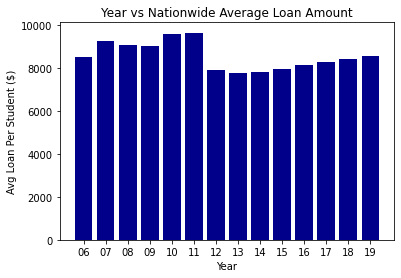

In [149]:
# Year vs Average Loan Amount Nationwide
years = ["06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19"]

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(average_loan_per_person_array.items(), columns=['Year_Quarter', 'Avg Loan Amount'])
x = df["Year_Quarter"]
y = df["Avg Loan Amount"]

plt.bar(x, y, width=0.8, color='darkblue')
plt.xlabel("Year")
plt.ylabel("Avg Loan Per Student ($)")
plt.title("Year vs Nationwide Average Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.show()


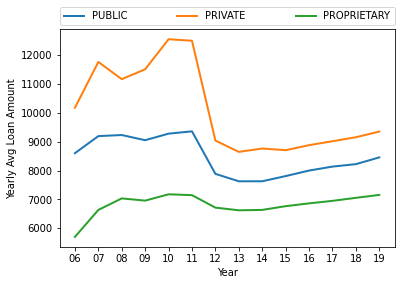

In [150]:
# Year vs Average Loan Amount Per School Type
for school_type in average_loan_school_type_array:
    if school_type.startswith("FOREIGN"):
        continue
    df = pd.DataFrame(average_loan_school_type_array[school_type].items(), columns=['Year', 'Avg Loan Amount'])
    x = df["Year"]
    y = df["Avg Loan Amount"]
    plt.plot(x, y, linewidth=2, label=school_type)

plt.xlabel("Year")
plt.ylabel("Yearly Avg Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.) # https://stackoverflow.com/questions/44413020
plt.show()


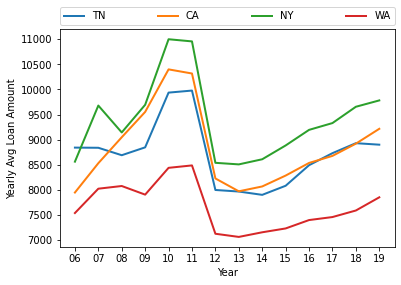

In [151]:
# Year vs Average Loan Amount Per State
state_list = ["TN", "CA", "NY", "WA"]

# for state in average_loan_state_array: # this will graph all states
for state in state_list:
    df = pd.DataFrame(average_loan_state_array[state].items(), columns=['Year_Quarter', 'Avg Loan Amount'])
    x = df["Year_Quarter"]
    y = df["Avg Loan Amount"]    
    plt.plot(x, y, linewidth=2, label=state)

plt.xlabel("Year")
plt.ylabel("Yearly Avg Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.) # https://stackoverflow.com/questions/44413020
plt.show()

# todo, consider https://python-graph-gallery.com/124-spaghetti-plot/

# Now looking at school's average loan vs average ACT score:

In [152]:
import xlrd
import matplotlib.pyplot as plt
import numpy as np

quarters = ["Q1", "Q2", "Q3", "Q4"]

colleges = ['CALIFORNIA INSTITUTE OF TECHNOLOGY', 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY', \
           'UNIVERSITY OF CHICAGO (THE)', 'VANDERBILT UNIVERSITY', 'OHIO STATE UNIVERSITY', \
           'UNIVERSITY OF TENNESSEE', 'UNIVERSITY OF ALABAMA AT BIRMINGHAM', \
           'TENNESSEE TECHNOLOGICAL UNIVERSITY', 'JACKSONVILLE UNIVERSITY', 'TENNESSEE STATE UNIVERSITY']
act_scores = [36, 35, 34, 34, 30, 27, 25, 24, 23, 18]


In [153]:
def getData(filename):
    workbook = xlrd.open_workbook(filename)
    worksheet = workbook.sheet_by_index(0)

    data = []
    start_row = 6

    for i in range(start_row, worksheet.nrows):
        school_name = worksheet.cell(i, 1).value
        school_state = worksheet.cell(i, 2).value
        school_type = worksheet.cell(i, 4).value
        school_sub = [worksheet.cell(i, 5).value, worksheet.cell(i, 6).value, worksheet.cell(i, 7).value,\
                      worksheet.cell(i, 8).value, worksheet.cell(i, 9).value]
        school_unsub = [worksheet.cell(i, 10).value, worksheet.cell(i, 11).value,\
                        worksheet.cell(i, 12).value, worksheet.cell(i, 13).value,\
                        worksheet.cell(i, 14).value]
        school_plus = [worksheet.cell(i, 20).value, worksheet.cell(i, 21).value,\
                       worksheet.cell(i, 22).value, worksheet.cell(i, 23).value,\
                       worksheet.cell(i, 24).value]

        row = {}
        row['name'] = school_name
        row['state'] = school_state
        row['type'] = school_type
        row['sub'] = school_sub
        row['unsub'] = school_unsub
        row['plus'] = school_plus
        data.append(row)
    return data

In [154]:
def loan_vs(data, colleges):
    sub_array = []
    unsub_array = []
    plus_array = []
    total_array = []
    for x in colleges:        
        tot_sub_rec = 0
        tot_unsub_rec = 0
        tot_plus_rec = 0
        tot_sub_dis = 0
        tot_unsub_dis = 0
        tot_plus_dis = 0
        
        for q in data:
            for row in q:
                if x == row['name']:
                    if row['sub'][4] != '-' and row['sub'][4] != ' -':
                        tot_sub_rec += row['sub'][3]
                        tot_sub_dis += row['sub'][4]
                    
                    if row['unsub'][4] != '-' and row['unsub'][4] != ' -':
                        tot_unsub_rec += row['unsub'][3]
                        tot_unsub_dis += row['unsub'][4]
                    
                    if row['plus'][4] != '-' and row['plus'][4] != ' -':
                        tot_plus_rec += row['plus'][3]
                        tot_plus_dis += row['plus'][4]
                    # print("found school:", x, "with tot_sub_dis =", tot_sub_dis)
                    break
        
        # these fix div by 0 errors
        if tot_sub_rec == 0:
            sub_per_rec = 0
        else:
            sub_per_rec = tot_sub_dis / tot_sub_rec
            
        if tot_unsub_rec == 0:
            unsub_per_rec = 0
        else:
            unsub_per_rec = tot_unsub_dis / tot_unsub_rec

        if tot_plus_rec == 0:
            plus_per_rec = 0
        else:
            plus_per_rec = tot_plus_dis / tot_plus_rec

        
        total = tot_sub_dis + tot_unsub_dis + tot_plus_dis
        count = tot_sub_rec + tot_unsub_rec + tot_plus_rec
        
        if count == 0:
            average = 0
        else:
            average = total / count
                
        sub_array.append(round(sub_per_rec, 2))
        unsub_array.append(round(unsub_per_rec, 2))
        plus_array.append(round(plus_per_rec,2))
        total_array.append(round(average, 2))


        # print(x)
        # print('Subsidized:', sub_per_rec)
        # print('Unsubsidized:', unsub_per_rec)
        # print('Plus:', plus_per_rec)
        # print(average)
        # print()
        
        
    # return sub_array, unsub_array, plus_array
    return total_array

In [155]:
#Average Loan vs. ACT score of the school
data = []
for quarter in quarters:
    filename = '../data/06-20/17-18/DL_Dashboard_AY2017_2018_' + quarter + '.xls'
    data.append(getData(filename))

loan_data = loan_vs(data, colleges)


In [156]:
for i in range(len(colleges)):
    print(colleges[i], "has an average act score of", act_scores[i], "and an average loan of $" + str(loan_data[i] * 4), "per year")

CALIFORNIA INSTITUTE OF TECHNOLOGY has an average act score of 36 and an average loan of $3150.57 per year
MASSACHUSETTS INSTITUTE OF TECHNOLOGY has an average act score of 35 and an average loan of $4019.96 per year
UNIVERSITY OF CHICAGO (THE) has an average act score of 34 and an average loan of $2793.93 per year
VANDERBILT UNIVERSITY has an average act score of 34 and an average loan of $4113.42 per year
OHIO STATE UNIVERSITY has an average act score of 30 and an average loan of $2480.91 per year
UNIVERSITY OF TENNESSEE has an average act score of 27 and an average loan of $2882.22 per year
UNIVERSITY OF ALABAMA AT BIRMINGHAM has an average act score of 25 and an average loan of $2363.58 per year
TENNESSEE TECHNOLOGICAL UNIVERSITY has an average act score of 24 and an average loan of $2131.99 per year
JACKSONVILLE UNIVERSITY has an average act score of 23 and an average loan of $3007.39 per year
TENNESSEE STATE UNIVERSITY has an average act score of 18 and an average loan of $2442.4

[Text(0, 0.5, 'Avg Loan Amount'), Text(0.5, 0, 'Average ACT Score')]

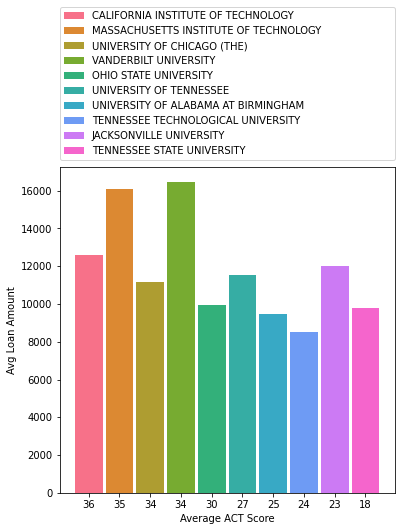

In [159]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

x = act_scores
y = [i*4 for i in loan_data] 

f, ax = plt.subplots(figsize=(6, 6))
colors = sns.color_palette("husl", len(colleges))
xticks = [i for i in range(len(colleges))]

for i in range(len(colleges)):
    plt.bar(xticks[i], y[i], width=0.9, color=colors[i], label=colleges[i])

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, mode="expand", borderaxespad=0.) # https://stackoverflow.com/questions/44413020
plt.xticks(xticks, x)

ax.set(ylabel="Avg Loan Amount", xlabel="Average ACT Score")
